<a href="https://colab.research.google.com/github/rashmidkulkarni/Immunogenicity-Prediction/blob/main/Immune_response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import files
uploaded = files.upload()

Saving HLA and in vitro proliferation assay for Herceptin Humira and  Erenumab  VJ.xlsx to HLA and in vitro proliferation assay for Herceptin Humira and  Erenumab  VJ (1).xlsx


In [43]:
import pandas as pd

xls = pd.ExcelFile("HLA and in vitro proliferation assay for Herceptin Humira and  Erenumab  VJ.xlsx")

print(xls.sheet_names)

['Export Summary', 'erenumab', 'Herceptin', 'Humira', 'AMG 334 in silico (Tepitope+IED', 'Herceptin IEDB+Tepitope', 'Humira IEDB+Tepitope', 'Complied Data']


In [44]:
df = xls.parse("Herceptin",skiprows=2)


df.columns = [
    "Drug", "Donor", "HLA", "Tcell_Proliferation",
    "SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8",
    "Extra1", "Extra2", "Extra3", "Extra4", "Extra5"
]


df["Drug"] = df["Drug"].fillna("Herceptin")

df = df[["Drug", "Donor", "HLA", "Tcell_Proliferation", "SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]]


for col in ["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[df["Donor"].notna()]


df.reset_index(drop=True, inplace=True)

df.head()


,Drug,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8
0,Herceptin,1.0,"DRB1*03,DRB1*15",positive,0.64,2.12,1.68,1.17
1,Herceptin,2.0,"DRB1*03,DRB1*04",negative,0.81,1.50,1.08,1.01
2,Herceptin,3.0,DRB1*15,negative,0.68,1.38,1.11,0.79
3,Herceptin,4.0,DRB1*13,negative,0.57,1.00,1.00,0.57
4,Herceptin,5.0,"DRB1*07,DRB1*13",negative,1.04,1.24,0.97,0.75


In [45]:
df_hum = xls.parse("Humira",skiprows=2)


df_hum.columns = [
    "Drug", "Donor", "HLA", "Tcell_Proliferation",
    "SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8",
]


df_hum["Drug"] = df_hum["Drug"].fillna("Humira")


df_hum = df_hum[["Drug", "Donor", "HLA", "Tcell_Proliferation", "SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]]


for col in ["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]:
    df_hum[col] = pd.to_numeric(df[col], errors='coerce')


df_hum =df_hum[df_hum["Donor"].notna()]

df_hum.reset_index(drop=True, inplace=True)

df_hum.head()

,Drug,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8
0,Humira,2.0,"DRB1*04,DRB1*07",negative,0.64,2.12,1.68,1.17
1,Humira,3.0,"DRB1*01,DRB1*03",negative,0.81,1.50,1.08,1.01
2,Humira,4.0,"DRB1*03,DRB1*07",negative,0.68,1.38,1.11,0.79
3,Humira,5.0,"DRB1*04,DRB1*11",negative,0.57,1.00,1.00,0.57
4,Humira,6.0,"DRB1*03,DRB1*04",negative,1.04,1.24,0.97,0.75


In [46]:
df_er = xls.parse("erenumab", skiprows=2)

df_er.columns = [
    "Drug", "Donor", "HLA", "Tcell_Proliferation",
    "SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8",
    "Extra1", "Extra2", "Extra3", "Extra4", "Extra5","Extra6","Extra7"
]

df_er["Drug"] = df_er["Drug"].fillna("Erenumab")

df_er = df_er[["Drug", "Donor", "HLA", "Tcell_Proliferation", "SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]]

for col in ["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]:
    df_er[col] = pd.to_numeric(df_er[col], errors='coerce')

df_er = df_er[df_er["Donor"].notna()]

df_er.reset_index(drop=True, inplace=True)

# Preview
df_er.head()


,Drug,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8
0,Erenumab,2.0,"DRB1*03,DRB1*04",negative,1.57,1.86,1.53,1.39
1,Erenumab,3.0,DRB1*15,negative,1.48,1.67,1.82,1.38
2,Erenumab,4.0,DRB1*13,negative,0.91,1.54,1.01,1.29
3,Erenumab,5.0,"DRB1*07,DRB1*13",negative,1.33,1.54,1.28,1.50
4,Erenumab,6.0,"DRB1*01,DRB1*08",positive,1.78,1.76,1.20,1.88


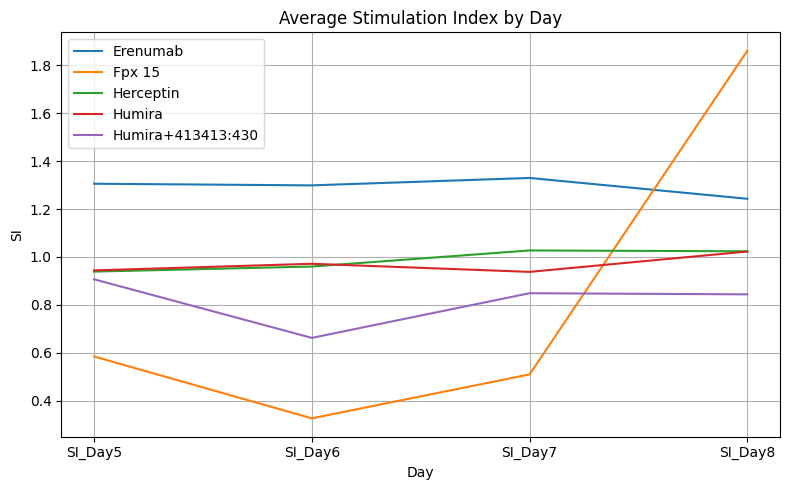

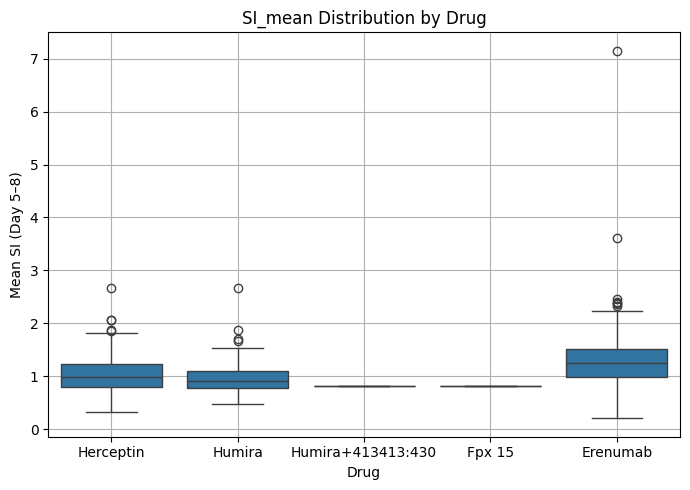

                  SI_mean                                                    \
                    count      mean       std       min       25%       50%   
Drug                                                                          
Erenumab            199.0  1.294356  0.635389  0.204230  0.993362  1.244749   
Fpx 15                1.0  0.820016       NaN  0.820016  0.820016  0.820016   
Herceptin           400.0  1.034548  0.321559  0.330000  0.803750  0.990000   
Humira               97.0  0.968753  0.321305  0.480000  0.775000  0.902500   
Humira+413413:430     1.0  0.814984       NaN  0.814984  0.814984  0.814984   

                                      SI_std            ...            \
                        75%       max  count      mean  ...       75%   
Drug                                                    ...             
Erenumab           1.522964  7.150825  199.0  0.300429  ...  0.366317   
Fpx 15             0.820016  0.820016    1.0  0.702797  ...  0.702797   
He

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all drug dataframes
df_all = pd.concat([df, df_hum, df_er], ignore_index=True)
df_all["Drug"] = (
    df_all["Drug"]
    .astype(str)
    .str.strip()                  # Remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # Normalize internal spaces
    .str.title()                  # Standardize casing (e.g. Herceptin)
)


df_all["SI_mean"] = df_all[["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]].mean(axis=1)
df_all["SI_std"] = df_all[["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]].std(axis=1)
df_all["SI_range"] = df_all[["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]].max(axis=1) - df_all[["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]].min(axis=1)
df_all["Tcell_Positive"] = df_all["SI_mean"] > 1.5

summary_stats = df_all.groupby("Drug")[["SI_mean", "SI_std", "SI_range"]].describe()

positivity_rate = df_all.groupby("Drug")["Tcell_Positive"].mean().reset_index()

mean_si_by_day = df_all.groupby("Drug")[["SI_Day5", "SI_Day6", "SI_Day7", "SI_Day8"]].mean().T

plt.figure(figsize=(8, 5))
for drug in mean_si_by_day.columns:
    plt.plot(mean_si_by_day.index, mean_si_by_day[drug], label=drug)
plt.title("Average Stimulation Index by Day")
plt.ylabel("SI")
plt.xlabel("Day")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(data=df_all, x="Drug", y="SI_mean")
plt.title("SI_mean Distribution by Drug")
plt.ylabel("Mean SI (Day 5–8)")
plt.grid(True)
plt.tight_layout()
plt.show()

print(summary_stats)
print(positivity_rate)


In [48]:
# Parse HLA into binary features
from sklearn.preprocessing import MultiLabelBinarizer

# Convert "DRB1*03,DRB1*15" → ["DRB1*03", "DRB1*15"]
df_all["HLA_List"] = df_all["HLA"].dropna().apply(lambda x: [allele.strip() for allele in x.split(",")])

# Binarize HLA allele presence
mlb = MultiLabelBinarizer()
hla_encoded = pd.DataFrame(mlb.fit_transform(df_all["HLA_List"].fillna("").apply(lambda x: [] if x == "" else x)),
                           columns=mlb.classes_, index=df_all.index)

df_all = pd.concat([df_all, hla_encoded], axis=1)

In [49]:
df_all

,Drug,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8,SI_mean,SI_std,...,DRB1*04,DRB1*07,DRB1*08,DRB1*09,DRB1*11,DRB1*12,DRB1*13,DRB1*14,DRB1*15,DRB1*16
0,Herceptin,1.0,"DRB1*03,DRB1*15",positive,0.640000,2.120000,1.680000,1.170000,1.402500,0.639603,...,0,0,0,0,0,0,0,0,1,0
1,Herceptin,2.0,"DRB1*03,DRB1*04",negative,0.810000,1.500000,1.080000,1.010000,1.100000,0.290172,...,1,0,0,0,0,0,0,0,0,0
2,Herceptin,3.0,DRB1*15,negative,0.680000,1.380000,1.110000,0.790000,0.990000,0.317595,...,0,0,0,0,0,0,0,0,1,0
3,Herceptin,4.0,DRB1*13,negative,0.570000,1.000000,1.000000,0.570000,0.785000,0.248261,...,0,0,0,0,0,0,1,0,0,0
4,Herceptin,5.0,"DRB1*07,DRB1*13",negative,1.040000,1.240000,0.970000,0.750000,1.000000,0.202155,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,Erenumab,46.0,"DRB1*01,DRB1*15",negative,0.387843,0.168484,0.176415,0.084178,0.204230,0.129329,...,0,0,0,0,0,0,0,0,1,0
694,Erenumab,47.0,"DRB1*04,DRB1*15",negative,1.037114,0.960708,1.195901,0.889377,1.020775,0.131415,...,1,0,0,0,0,0,0,0,1,0
695,Erenumab,48.0,DRB1*04,negative,1.053931,1.530064,1.421805,1.493232,1.374758,0.218556,...,1,0,0,0,0,0,0,0,0,0
696,Erenumab,49.0,"DRB1*07,DRB1*08",negative,0.725483,0.637715,0.626318,0.401152,0.597667,0.138299,...,0,1,1,0,0,0,0,0,0,0


In [50]:
df_all["Zygosity"] = df_all["HLA"].apply(lambda x: len(set(x.split(","))) if pd.notna(x) else 0)
df_all

,Drug,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8,SI_mean,SI_std,...,DRB1*07,DRB1*08,DRB1*09,DRB1*11,DRB1*12,DRB1*13,DRB1*14,DRB1*15,DRB1*16,Zygosity
0,Herceptin,1.0,"DRB1*03,DRB1*15",positive,0.640000,2.120000,1.680000,1.170000,1.402500,0.639603,...,0,0,0,0,0,0,0,1,0,2
1,Herceptin,2.0,"DRB1*03,DRB1*04",negative,0.810000,1.500000,1.080000,1.010000,1.100000,0.290172,...,0,0,0,0,0,0,0,0,0,2
2,Herceptin,3.0,DRB1*15,negative,0.680000,1.380000,1.110000,0.790000,0.990000,0.317595,...,0,0,0,0,0,0,0,1,0,1
3,Herceptin,4.0,DRB1*13,negative,0.570000,1.000000,1.000000,0.570000,0.785000,0.248261,...,0,0,0,0,0,1,0,0,0,1
4,Herceptin,5.0,"DRB1*07,DRB1*13",negative,1.040000,1.240000,0.970000,0.750000,1.000000,0.202155,...,1,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,Erenumab,46.0,"DRB1*01,DRB1*15",negative,0.387843,0.168484,0.176415,0.084178,0.204230,0.129329,...,0,0,0,0,0,0,0,1,0,2
694,Erenumab,47.0,"DRB1*04,DRB1*15",negative,1.037114,0.960708,1.195901,0.889377,1.020775,0.131415,...,0,0,0,0,0,0,0,1,0,2
695,Erenumab,48.0,DRB1*04,negative,1.053931,1.530064,1.421805,1.493232,1.374758,0.218556,...,0,0,0,0,0,0,0,0,0,1
696,Erenumab,49.0,"DRB1*07,DRB1*08",negative,0.725483,0.637715,0.626318,0.401152,0.597667,0.138299,...,1,1,0,0,0,0,0,0,0,2


In [51]:
df_all = pd.get_dummies(df_all, columns=["Drug"])
df_all

,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8,SI_mean,SI_std,SI_range,...,DRB1*13,DRB1*14,DRB1*15,DRB1*16,Zygosity,Drug_Erenumab,Drug_Fpx 15,Drug_Herceptin,Drug_Humira,Drug_Humira+413413:430
0,1.0,"DRB1*03,DRB1*15",positive,0.640000,2.120000,1.680000,1.170000,1.402500,0.639603,1.480000,...,0,0,1,0,2,False,False,True,False,False
1,2.0,"DRB1*03,DRB1*04",negative,0.810000,1.500000,1.080000,1.010000,1.100000,0.290172,0.690000,...,0,0,0,0,2,False,False,True,False,False
2,3.0,DRB1*15,negative,0.680000,1.380000,1.110000,0.790000,0.990000,0.317595,0.700000,...,0,0,1,0,1,False,False,True,False,False
3,4.0,DRB1*13,negative,0.570000,1.000000,1.000000,0.570000,0.785000,0.248261,0.430000,...,1,0,0,0,1,False,False,True,False,False
4,5.0,"DRB1*07,DRB1*13",negative,1.040000,1.240000,0.970000,0.750000,1.000000,0.202155,0.490000,...,1,0,0,0,2,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,46.0,"DRB1*01,DRB1*15",negative,0.387843,0.168484,0.176415,0.084178,0.204230,0.129329,0.303665,...,0,0,1,0,2,True,False,False,False,False
694,47.0,"DRB1*04,DRB1*15",negative,1.037114,0.960708,1.195901,0.889377,1.020775,0.131415,0.306524,...,0,0,1,0,2,True,False,False,False,False
695,48.0,DRB1*04,negative,1.053931,1.530064,1.421805,1.493232,1.374758,0.218556,0.476133,...,0,0,0,0,1,True,False,False,False,False
696,49.0,"DRB1*07,DRB1*08",negative,0.725483,0.637715,0.626318,0.401152,0.597667,0.138299,0.324330,...,0,0,0,0,2,True,False,False,False,False


In [52]:
df_all


,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8,SI_mean,SI_std,SI_range,...,DRB1*13,DRB1*14,DRB1*15,DRB1*16,Zygosity,Drug_Erenumab,Drug_Fpx 15,Drug_Herceptin,Drug_Humira,Drug_Humira+413413:430
0,1.0,"DRB1*03,DRB1*15",positive,0.640000,2.120000,1.680000,1.170000,1.402500,0.639603,1.480000,...,0,0,1,0,2,False,False,True,False,False
1,2.0,"DRB1*03,DRB1*04",negative,0.810000,1.500000,1.080000,1.010000,1.100000,0.290172,0.690000,...,0,0,0,0,2,False,False,True,False,False
2,3.0,DRB1*15,negative,0.680000,1.380000,1.110000,0.790000,0.990000,0.317595,0.700000,...,0,0,1,0,1,False,False,True,False,False
3,4.0,DRB1*13,negative,0.570000,1.000000,1.000000,0.570000,0.785000,0.248261,0.430000,...,1,0,0,0,1,False,False,True,False,False
4,5.0,"DRB1*07,DRB1*13",negative,1.040000,1.240000,0.970000,0.750000,1.000000,0.202155,0.490000,...,1,0,0,0,2,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,46.0,"DRB1*01,DRB1*15",negative,0.387843,0.168484,0.176415,0.084178,0.204230,0.129329,0.303665,...,0,0,1,0,2,True,False,False,False,False
694,47.0,"DRB1*04,DRB1*15",negative,1.037114,0.960708,1.195901,0.889377,1.020775,0.131415,0.306524,...,0,0,1,0,2,True,False,False,False,False
695,48.0,DRB1*04,negative,1.053931,1.530064,1.421805,1.493232,1.374758,0.218556,0.476133,...,0,0,0,0,1,True,False,False,False,False
696,49.0,"DRB1*07,DRB1*08",negative,0.725483,0.637715,0.626318,0.401152,0.597667,0.138299,0.324330,...,0,0,0,0,2,True,False,False,False,False


In [53]:
df_all["Tcell_Positive"] = df_all["SI_mean"] > 1.5

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# 1. Select features (exclude SI values and raw HLA strings)
feature_cols = [col for col in df_all.columns
                if col.startswith("DRB1*") or
                   col.startswith("Drug_") or
                   col == "Zygosity"]

X = df_all[feature_cols]
y = df_all["Tcell_Positive"]

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# # 3. Train model
# clf = RandomForestClassifier(class_weight='balanced', random_state=42)
# clf.fit(X_train, y_train)

# # 4. Predict + Evaluate
# y_pred = clf.predict(X_test)
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # 5. Feature importances
# importances = pd.Series(clf.feature_importances_, index=X.columns)
# top_features = importances.sort_values(ascending=False).head(15)

# # 6. Plot
# top_features.plot(kind="barh", figsize=(8, 5), title="Top 15 Feature Importances")
# plt.gca().invert_yaxis()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest (your current model)
clf_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("\n🟩 Random Forest")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Step 1: Sanitize column names
X_sanitized = X.copy()
X_sanitized.columns = [col.replace("*", "_").replace(":", "_").replace(".", "_") for col in X_sanitized.columns]

# Step 2: Train LightGBM with cleaned column names
clf_lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
clf_lgbm.fit(X_sanitized.iloc[X_train.index], y_train)
y_pred_lgbm = clf_lgbm.predict(X_sanitized.iloc[X_test.index])
print("\n🟨 LightGBM (Sanitized Columns)")
print("Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))



# XGBoost
# Use scale_pos_weight = (#negatives / #positives) to balance classes
scale_pos_weight = (y == 0).sum() / (y == 1).sum()
clf_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test)
print("\n🟥 XGBoost")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))




🟩 Random Forest
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.84      0.86       122
        True       0.23      0.33      0.27        18

    accuracy                           0.77       140
   macro avg       0.56      0.58      0.57       140
weighted avg       0.81      0.77      0.79       140

Confusion Matrix:
 [[102  20]
 [ 12   6]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 71, number of negative: 487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 558, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:20:28] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [27]:
import pandas as pd

# Load first few rows of the sheet
df_erenumab = pd.read_excel(
    "HLA and in vitro proliferation assay for Herceptin Humira and  Erenumab  VJ.xlsx",
    sheet_name="AMG 334 in silico (Tepitope+IED"
)

print(df_erenumab.shape)
print(df_erenumab.head())


(190, 22)
  MHC-II Binding Prediction Results   Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0                                 #  Light Chain        NaN        NaN   
1          Method used: recommended          NaN        NaN        NaN   
2                            allele      seq_num      start        end   
3                    HLA-DRB1*09:01            1        125        139   
4                    HLA-DRB1*09:01            1        126        140   

        Unnamed: 4                    Unnamed: 5       Unnamed: 6  \
0                #                           NaN                #   
1              NaN                           NaN              NaN   
2          peptide                        method  percentile_rank   
3  SSEELQANKATLVCL  Consensus (comb.lib./smm/nn)             0.06   
4  SEELQANKATLVCLI  Consensus (comb.lib./smm/nn)             0.06   

     Unnamed: 7     Unnamed: 8    Unnamed: 9  ...     Unnamed: 12  \
0           NaN            NaN           NaN  ...            

In [57]:
import pandas as pd
import re

def _norm(s):
    return re.sub(r'\s+', '_', str(s).strip().lower())

def _find_col(cols, *candidates):
    """Return the first column whose normalized name contains ALL tokens in any candidate."""
    ncols = [_norm(c) for c in cols]
    for cand in candidates:
        # cand can be a string like 'percentile_rank' or a tuple of tokens
        tokens = _norm(cand).split('_')
        for i, nc in enumerate(ncols):
            if all(tok in nc for tok in tokens):
                return cols[i]
    return None

def read_insilico_robust(file_path, sheet_name, header_seek_rows=10):
    """
    Reads an in-silico sheet (IEDB/NetMHCIIpan export) robustly:
    - auto-detect header row (within first `header_seek_rows` rows)
    - case-insensitive column matching for allele/peptide/percentile columns
    Returns a dataframe with standardized columns: Alleles, Peptide, Percentile_Rank
    """
    # Load without header to sniff header row
    sniff = pd.read_excel(file_path, sheet_name=sheet_name, header=None, nrows=header_seek_rows)
    header_row = None
    for r in range(min(header_seek_rows, len(sniff))):
        row = [_norm(x) for x in sniff.iloc[r].tolist()]
        if any('allele' in x for x in row) and any('percentile' in x for x in row):
            header_row = r
            break
    # fallback if not found: common case is header at row 2 or 3 (0-indexed)
    if header_row is None:
        header_row = 2

    df = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row)
    # Normalize column names for lookup but keep original names for selection
    cols = list(df.columns)

    # Find columns (accept several variants)
    col_allele = _find_col(cols, 'allele', 'hla_allele', 'hla-allele')
    col_peptide = _find_col(cols, 'peptide')
    col_percentile = _find_col(cols, 'percentile_rank', 'percentile rank', 'percentile')

    if col_allele is None or col_percentile is None:
        raise KeyError(
            f"Could not find required columns in sheet '{sheet_name}'. "
            f"Found columns: {cols}"
        )

    keep = [col_allele, col_percentile] + ([col_peptide] if col_peptide else [])
    out = df[keep].copy()
    # Standardize names
    rename_map = {col_allele: 'Alleles', col_percentile: 'Percentile_Rank'}
    if col_peptide: rename_map[col_peptide] = 'Peptide'
    out = out.rename(columns=rename_map)

    # Clean values
    out['Percentile_Rank'] = pd.to_numeric(out['Percentile_Rank'], errors='coerce')
    out = out.dropna(subset=['Alleles'])  # keep rows that actually have an allele

    return out

def process_insilico_sheet(df_all, file_path, sheet_name, drug_name, pr_thresh=1.0):
    """
    Robust end-to-end processor:
    - reads sheet
    - filters Percentile_Rank < pr_thresh
    - aligns to df_all schema (HLA one-hots, drugs, zygosity, SI_* as None)
    """
    df_ins = read_insilico_robust(file_path, sheet_name)

    # Filter strongest binders
    df_ins = df_ins[df_ins['Percentile_Rank'] < pr_thresh].reset_index(drop=True)

    # One-hot HLA: match df_all columns like DRB1*15 with Alleles like HLA-DRB1*15:01
    hla_cols = [c for c in df_all.columns if c.startswith("DRB1*")]

    def allele_has(hla_col, allele_value):
        if pd.isna(allele_value):
            return 0
        s = str(allele_value).replace("HLA-", "")
        # Accept either exact 2-digit group (e.g., DRB1*15) or full (DRB1*15:01)
        return int(hla_col in s)

    for h in hla_cols:
        df_ins[h] = df_ins['Alleles'].apply(lambda x: allele_has(h, x))

    # Core fields
    df_ins["Tcell_Proliferation"] = "positive"
    df_ins["Tcell_Positive"] = 1
    df_ins["Zygosity"] = None
    if "Donor" in df_all.columns:
        df_ins["Donor"] = "in-silico_" + (df_ins.index + 1).astype(str)

    # Add drugs (False by default)
    for col in df_all.columns:
        if col.startswith("Drug_") and col not in df_ins.columns:
            df_ins[col] = False
    # Set the intended drug True
    if drug_name in df_ins.columns:
        df_ins[drug_name] = True

    # Fill all missing columns to match df_all schema
    for col in df_all.columns:
        if col not in df_ins.columns:
            if col.startswith("SI_") or col in ["SI_mean", "SI_std", "SI_range"]:
                df_ins[col] = None
            elif col == "HLA":
                df_ins[col] = df_ins["Alleles"]
            elif col == "Tcell_Proliferation":
                df_ins[col] = "positive"
            elif col == "Tcell_Positive":
                df_ins[col] = 1
            elif col == "Zygosity":
                df_ins[col] = None
            elif col == "Donor":
                df_ins[col] = "in-silico_" + (df_ins.index + 1).astype(str)
            else:
                df_ins[col] = None

    # Reorder and return
    df_ins = df_ins[df_all.columns]
    return df_ins


In [58]:
file_path = "HLA and in vitro proliferation assay for Herceptin Humira and  Erenumab  VJ.xlsx"

# Map sheet names → drug column names
sheets_to_drugs = {
   "AMG 334 in silico (Tepitope+IED": "Drug_Erenumab",
    "Herceptin IEDB+Tepitope": "Drug_Herceptin",
    "Humira IEDB+Tepitope": "Drug_Humira"
}

# Process each sheet
insilico_dfs = []
for sheet, drug in sheets_to_drugs.items():
    df_syn = process_insilico_sheet(df_all, file_path, sheet, drug, pr_thresh=1.0)
    insilico_dfs.append(df_syn)

# Merge all: df_all + all synthetic
df_combined = pd.concat([df_all] + insilico_dfs, ignore_index=True)

# Fix Zygosity dtype
df_combined["Zygosity"] = pd.to_numeric(df_combined["Zygosity"], errors="coerce").fillna(-1).astype(int)


/tmp/ipython-input-2787568138.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_all] + insilico_dfs, ignore_index=True)


#after <1% percetile rate addition for erenumab,humira and
herceptin from in-silico list

In [59]:
df_combined.head()

,Donor,HLA,Tcell_Proliferation,SI_Day5,SI_Day6,SI_Day7,SI_Day8,SI_mean,SI_std,SI_range,...,DRB1*13,DRB1*14,DRB1*15,DRB1*16,Zygosity,Drug_Erenumab,Drug_Fpx 15,Drug_Herceptin,Drug_Humira,Drug_Humira+413413:430
0,1.0,"DRB1*03,DRB1*15",positive,0.64,2.12,1.68,1.17,1.4025,0.639603,1.48,...,0,0,1,0,2,False,False,True,False,False
1,2.0,"DRB1*03,DRB1*04",negative,0.81,1.50,1.08,1.01,1.1000,0.290172,0.69,...,0,0,0,0,2,False,False,True,False,False
2,3.0,DRB1*15,negative,0.68,1.38,1.11,0.79,0.9900,0.317595,0.70,...,0,0,1,0,1,False,False,True,False,False
3,4.0,DRB1*13,negative,0.57,1.00,1.00,0.57,0.7850,0.248261,0.43,...,1,0,0,0,1,False,False,True,False,False
4,5.0,"DRB1*07,DRB1*13",negative,1.04,1.24,0.97,0.75,1.0000,0.202155,0.49,...,1,0,0,0,2,False,False,True,False,False


In [60]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Fix dtype issue
df_combined["Zygosity"] = pd.to_numeric(df_combined["Zygosity"], errors="coerce").fillna(-1).astype(int)

# Select features
feature_cols = [col for col in df_combined.columns
                if col.startswith("DRB1*") or col.startswith("Drug_") or col == "Zygosity"]

X = df_combined[feature_cols].copy()
y = (df_combined["Tcell_Proliferation"] == "positive").astype(int)

# Sanitize column names
X.columns = [c.replace("*", "_").replace(":", "_").replace(".", "_") for c in X.columns]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train LightGBM
clf_lgbm = LGBMClassifier(class_weight="balanced", random_state=42)
clf_lgbm.fit(X_train, y_train)

# Evaluate
y_pred = clf_lgbm.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 420, number of negative: 495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 915, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i